<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/dataset1_decisionTree/notebooks/dataset1_clustered_decisiontrees_all_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44273 (\N{HANGUL SYLLABLE GOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

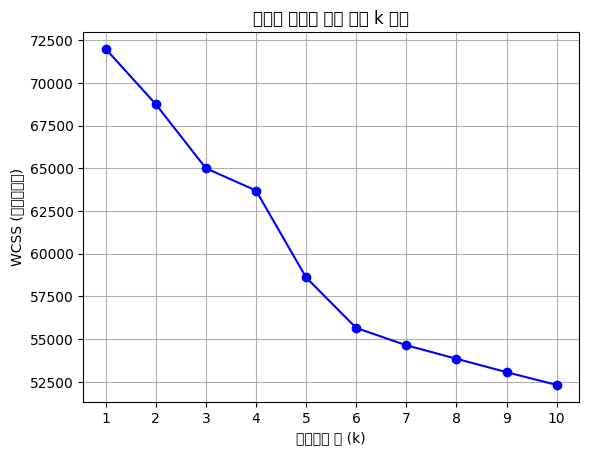

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("/content/processed_all_dataset2.csv")

# 2. 사용할 feature 선택 (수치형 변수만 사용)
features = df.select_dtypes(include=['float64', 'int64'])

# 3. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # X_scaled는 스케일링된 feature 데이터
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, 'bo-')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('WCSS (오차제곱합)')
plt.title('엘보우 방법을 통한 최적 k 찾기')
plt.xticks(K_range)
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50659 (\N{HANGUL SYLLABLE ES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

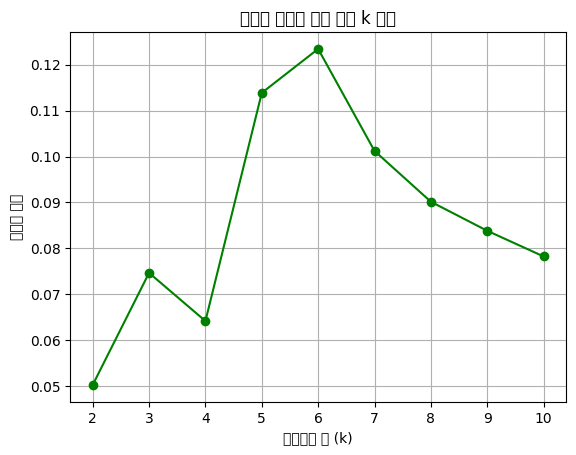

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('실루엣 점수')
plt.title('실루엣 분석을 통한 최적 k 찾기')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# k=6으로 KMeans 클러스터링
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
# 통계 집계 딕셔너리 정의
agg_dict = {
    'Happiness Score': ['mean', 'var']
}

# 'cluster', 'Happiness Score' 제외한 나머지 컬럼에 평균 적용
for col in df.columns:
    if col not in ['cluster', 'Happiness Score']:
        agg_dict[col] = 'mean'

# groupby 후 통계 계산
cluster_stats = df.groupby('cluster').agg(agg_dict).reset_index()

# MultiIndex 평탄화
cluster_stats.columns = ['_'.join(col).rstrip('_') if isinstance(col, tuple) else col for col in cluster_stats.columns]

# 결과 출력
print(cluster_stats)


   cluster  Happiness Score_mean  Happiness Score_var  Age_mean  \
0        0              0.486534             0.084990  0.495542   
1        1              0.485341             0.071817  0.498440   
2        2              0.491263             0.083267  0.516156   
3        3              0.481767             0.083383  0.500210   
4        4              0.475475             0.078995  0.520353   
5        5              0.506568             0.079368  0.486692   

   Exercise Level_mean  Sleep Hours_mean  Stress Level_mean  \
0             1.974654          0.043244           2.050691   
1             1.967822         -0.126892           1.992574   
2             1.997727         -0.004866           1.984091   
3             1.975904         -0.019945           1.985542   
4             1.961276          0.050833           1.972665   
5             1.974299          0.053130           2.016355   

   Work Hours per Week_mean  Screen Time per Day (Hours)_mean  \
0                  0.51

In [ ]:
# 컬럼별로 각 군집의 평균을 깔끔하게 보기
cluster_stats.T  # 전치(transpose)하면 개별 변수별 비교가 더 쉬워져


,0,1,2,3,4,5
cluster,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
Happiness Score_mean,0.486534,0.485341,0.491263,0.481767,0.475475,0.506568
Happiness Score_var,0.084990,0.071817,0.083267,0.083383,0.078995,0.079368
Age_mean,0.495542,0.498440,0.516156,0.500210,0.520353,0.486692
Exercise Level_mean,1.974654,1.967822,1.997727,1.975904,1.961276,1.974299
Sleep Hours_mean,0.043244,-0.126892,-0.004866,-0.019945,0.050833,0.053130
Stress Level_mean,2.050691,1.992574,1.984091,1.985542,1.972665,2.016355
Work Hours per Week_mean,0.510398,0.488258,0.501107,0.491196,0.514631,0.485742
Screen Time per Day (Hours)_mean,0.492435,0.504125,0.516383,0.522048,0.519628,0.533528
Social Interaction Score_mean,0.492755,0.498377,0.494912,0.492316,0.496482,0.507191


| 클러스터 | 행복 점수  | 특징                      |
| ---- | ------ | ----------------------- |
| 5    | **최고** | 캐나다, 사회성↑, 수면↑, PTSD 있음 |
| 2    | 중상     | 미국 비중 있음, 운동량 높음        |
| 4    | **최저** | 일본, 스트레스↓, 정신건강 문제↑     |
| 3    | 하위권    | 브라질, 식단 다양성↑            |
| 0/1  | 평균선    | 인도/독일 기반, 정신건강 문제 골고루   |


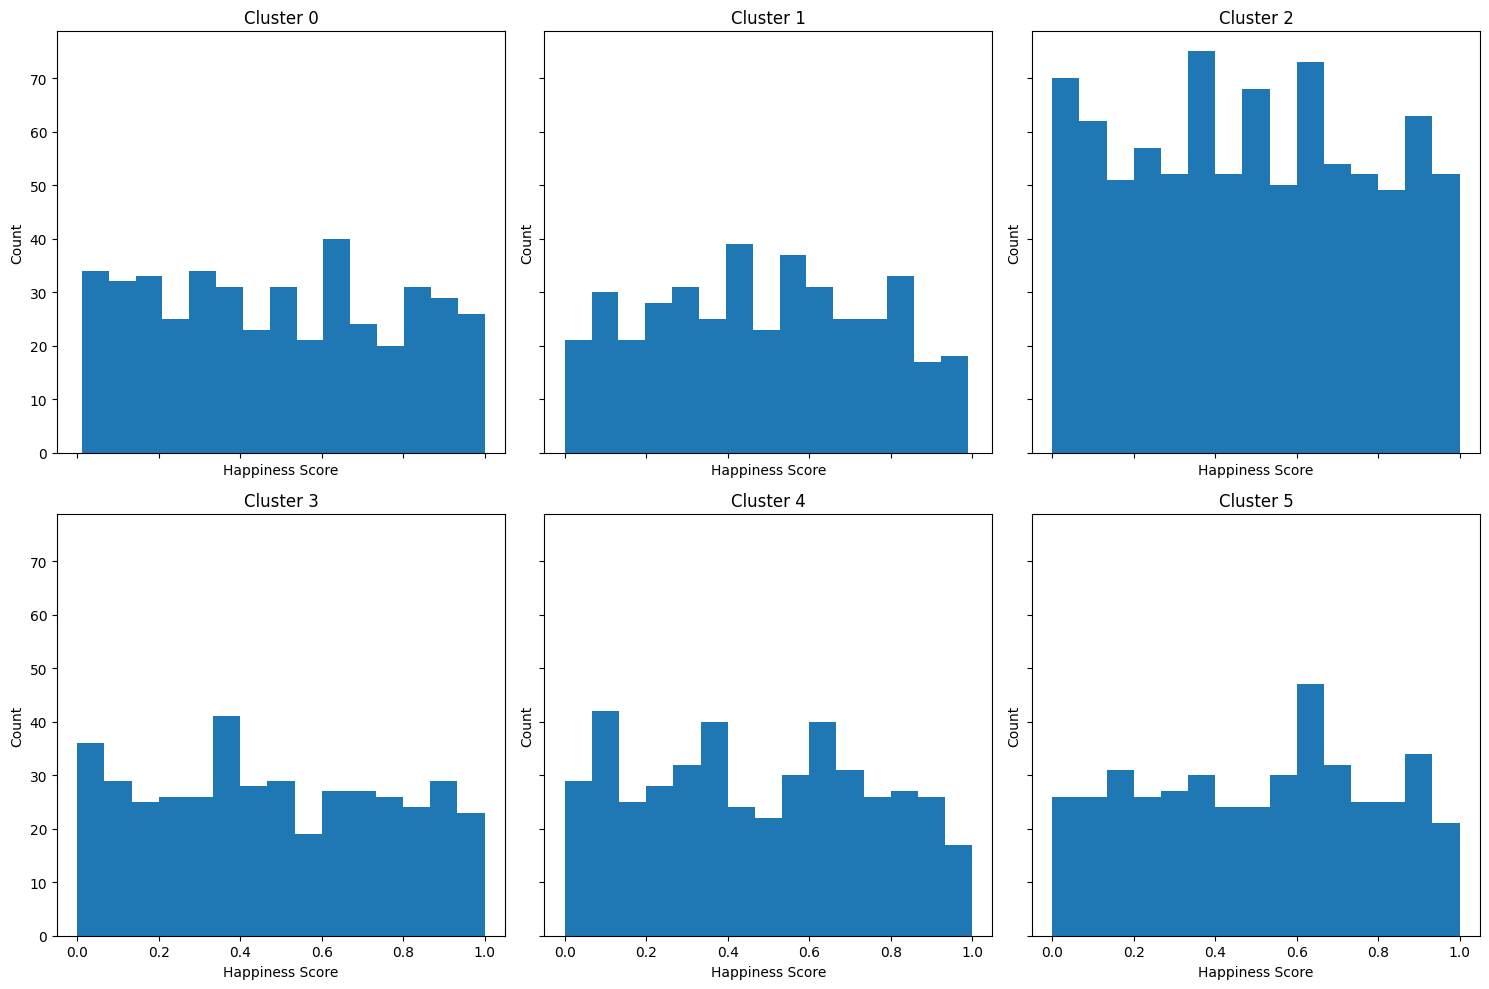

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
clusters = sorted(df['cluster'].unique())

for ax, c in zip(axes.flatten(), clusters):
    data = df.loc[df['cluster'] == c, 'Happiness Score']
    ax.hist(data, bins=15)
    ax.set_title(f'Cluster {c}')
    ax.set_xlabel('Happiness Score')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 예시) df, X_scaled가 이미 존재, df['cluster'] 있음 가정

results = []

# 예측할 컬럼
target = 'Happiness Score'

# 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

for cluster_label in sorted(df['cluster'].unique()):
    # 클러스터별 데이터 분리
    cluster_data = df[df['cluster'] == cluster_label]

    # 타겟과 피처 분리
    X_cluster = cluster_data.drop(columns=[target, 'cluster'])
    y_cluster = cluster_data[target]

    # train/test 분리 (train 80%, test 20%)
    X_train, X_test, y_train, y_test = train_test_split(
        X_cluster, y_cluster, test_size=0.2, random_state=42
    )

    # 결정트리 모델
    dt = DecisionTreeRegressor(random_state=42)

    # GridSearchCV로 하이퍼파라미터 튜닝 (5-fold CV)
    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # 베스트 모델로 테스트 세트 예측
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # 성능 평가
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # 결과 저장
    results.append({
        'cluster': cluster_label,
        'best_params': grid_search.best_params_,
        'test_r2': r2,
        'test_mse': mse
    })

# 결과를 DataFrame으로 정리해 출력
results_df = pd.DataFrame(results)
print(results_df)


   cluster                                        best_params   test_r2  \
0        0  {'max_depth': 3, 'min_samples_leaf': 4, 'min_s...  0.041833   
1        1  {'max_depth': 3, 'min_samples_leaf': 4, 'min_s... -0.152122   
2        2  {'max_depth': 3, 'min_samples_leaf': 4, 'min_s... -0.045929   
3        3  {'max_depth': 3, 'min_samples_leaf': 1, 'min_s... -0.112786   
4        4  {'max_depth': 3, 'min_samples_leaf': 2, 'min_s... -0.001679   
5        5  {'max_depth': 3, 'min_samples_leaf': 2, 'min_s... -0.159044   

   test_mse  
0  0.095191  
1  0.093494  
2  0.086686  
3  0.095745  
4  0.072008  
5  0.089539  


In [ ]:
from sklearn.ensemble import RandomForestRegressor

results_rf = []

for cluster_label in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    X_cluster = cluster_data.drop(columns=[target, 'cluster'])
    y_cluster = cluster_data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X_cluster, y_cluster, test_size=0.2, random_state=42
    )

    rf = RandomForestRegressor(random_state=42)
    param_grid_rf = {
        'n_estimators': [50, 100],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
    grid_search_rf.fit(X_train, y_train)

    best_model_rf = grid_search_rf.best_estimator_
    y_pred = best_model_rf.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results_rf.append({
        'cluster': cluster_label,
        'best_params': grid_search_rf.best_params_,
        'test_r2': r2,
        'test_mse': mse
    })

results_rf_df = pd.DataFrame(results_rf)
print(results_rf_df)


   cluster                                        best_params   test_r2  \
0        0  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s... -0.068763   
1        1  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s... -0.192366   
2        2  {'max_depth': 5, 'min_samples_leaf': 2, 'min_s... -0.023475   
3        3  {'max_depth': 10, 'min_samples_leaf': 1, 'min_... -0.117686   
4        4  {'max_depth': 5, 'min_samples_leaf': 2, 'min_s... -0.015887   
5        5  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s... -0.092716   

   test_mse  
0  0.106178  
1  0.096760  
2  0.084825  
3  0.096166  
4  0.073030  
5  0.084415  
